In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tnrange

In [2]:

mode = "CA1_clust16-30_noNA"
stim = np.load("/media/hdd01/sklee/"+mode+"/data/stim_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.7_gB1.2_noDendNa_Er1_Ir7.5_random_NR_rep16_stimseed1.npy")

In [3]:
repeat = 16
duration = 10000
E_no = 2000
I_no = 200
full_e_neural = np.zeros((repeat*duration, E_no))
full_i_neural = np.zeros((repeat*duration, I_no))

for i in tnrange(16):
    part_e_neural = np.zeros((duration, E_no))
    part_i_neural = np.zeros((duration, I_no))
    
    stim_e = stim[np.where(stim[:,0] == i+1)[0]]
    stim_i = stim[np.where(stim[:,0] == -i-1)[0]]
    
    bins = np.arange(0,duration+1,1)
    e_counts, _ = np.histogram(stim_e[:,2], bins)
    i_counts, _ = np.histogram(stim_i[:,2], bins)
    
    e_count = 0
    for j in range(e_counts.shape[0]):
        e_bin = e_counts[j]
        for k in range(e_bin):
            e_syn = int(stim_e[e_count,1])
            part_e_neural[j, e_syn] += 1
            e_count += 1
           
    i_count=0
    for j in range(i_counts.shape[0]):
        i_bin = i_counts[j]
        for k in range(i_bin):
            i_syn = int(stim_i[i_count,1])
            part_i_neural[j, i_syn] += 1
            i_count += 1
            
    print(np.sum(part_e_neural), e_count, np.sum(e_counts), stim_e.shape[0])
    print(np.sum(part_i_neural), i_count, np.sum(i_counts), stim_i.shape[0])
    
    full_e_neural[i*duration:(i+1)*duration] = part_e_neural
    full_i_neural[i*duration:(i+1)*duration] = part_i_neural
    
print(np.sum(full_e_neural)+np.sum(full_i_neural), stim.shape[0])

<ipython-input-3-5132b7fd353f>:8: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(16):


37511.0 37511 37511 37521
13919.0 13919 13919 13922
37596.0 37596 37596 37600
14385.0 14385 14385 14386
37723.0 37723 37723 37730
14002.0 14002 14002 14005
37654.0 37654 37654 37667
14191.0 14191 14191 14192
37715.0 37715 37715 37719
14178.0 14178 14178 14180
37828.0 37828 37828 37835
14164.0 14164 14164 14170
38027.0 38027 38027 38034
14352.0 14352 14352 14352
37717.0 37717 37717 37727
14341.0 14341 14341 14342
37665.0 37665 37665 37675
14248.0 14248 14248 14250
37359.0 37359 37359 37362
14243.0 14243 14243 14243
37820.0 37820 37820 37829
14191.0 14191 14191 14196
37947.0 37947 37947 37957
14145.0 14145 14145 14147
37982.0 37982 37982 37991
14097.0 14097 14097 14106
37828.0 37828 37828 37835
14247.0 14247 14247 14250
37701.0 37701 37701 37713
14221.0 14221 14221 14223
37818.0 37818 37818 37827
14287.0 14287 14287 14290

831102.0 831276


In [4]:
np.save("/media/hdd01/sklee/"+mode+"/data/Espikes_neural.npy", full_e_neural)
np.save("/media/hdd01/sklee/"+mode+"/data/Ispikes_neural.npy", full_i_neural)

In [83]:
mode = "CA1_clust0"

e_locs = np.load("/media/hdd01/sklee/"+mode+"/data/Elocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.7_gB1.2_noDendNa_Er1_Ir7.5_random_NR_rep16_stimseed1.npy")
i_locs = np.load("/media/hdd01/sklee/"+mode+"/data/Ilocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.7_gB1.2_noDendNa_Er1_Ir7.5_random_NR_rep16_stimseed1.npy")

#syn_locs = np.load("/media/hdd01/sklee/CA1_clust25-20/data/synlocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep16_stimseed1.npy")
#e_locs = syn_locs[:2000]
#i_locs = syn_locs[2000:]

e_no = e_locs.shape[0]
i_no = i_locs.shape[0]

In [84]:
print(np.min(e_locs[:,0]))
print(np.max(e_locs[:,0]))
print(np.min(i_locs[:,0]))
print(np.max(i_locs[:,0]))


0.0
152.0
-1.0
152.0


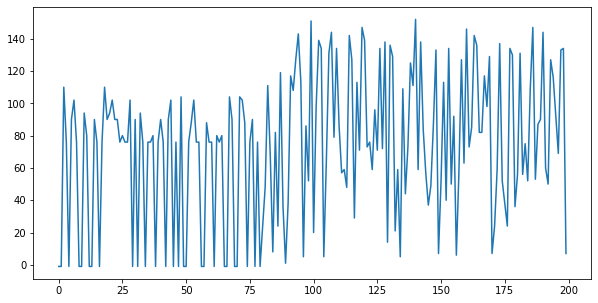

In [85]:
plt.figure(figsize = (10,5))
plt.plot(i_locs[:,0])

In [88]:
sub_no = 1

if sub_no == 1:
    C_syn_e = np.ones((1,2000))
    C_syn_i = np.ones((1,200))
    C_den = np.ones((1,1))


elif sub_no == 6:
    C_syn_e = np.zeros((6,2000))
    C_syn_i = np.zeros((6,200))

    for i in range(2000):
        dend = e_locs[i,0]
        if dend <= 15:
            C_syn_e[1,i] = 1
        elif (dend >= 16) & (dend <= 46):
            C_syn_e[2,i] = 1
        elif (dend >= 47) & (dend <= 61):
            C_syn_e[3,i] = 1
        elif (dend >= 62) & (dend <= 74):
            C_syn_e[4,i] = 1
        elif dend >= 75:
            C_syn_e[5,i] = 1

    for i in range(200):
        dend = i_locs[i,0]
        
        if dend < 0:
            C_syn_i[0,i] = 1
        elif (dend > 0) & (dend <= 15):
            C_syn_i[1,i] = 1
        elif (dend >= 16) & (dend <= 46):
            C_syn_i[2,i] = 1
        elif (dend >= 47) & (dend <= 61):
            C_syn_i[3,i] = 1
        elif (dend >= 62) & (dend <= 74):
            C_syn_i[4,i] = 1
        elif dend >= 75:
            C_syn_i[5,i] = 1

    C_den = np.zeros((6,6))
    C_den[0,1:] = 1
    
elif sub_no == 11:
    C_syn_e = np.zeros((11,2000))
    C_syn_i = np.zeros((11,200))
    
    for i in range(2000):
        dend = e_locs[i,0]
        if dend <= 15:
            C_syn_e[1,i] = 1
        elif (dend >= 16) & (dend <= 46):
            C_syn_e[2,i] = 1
        elif (dend >= 47) & (dend <= 61):
            C_syn_e[3,i] = 1
        elif (dend >= 62) & (dend <= 74):
            C_syn_e[4,i] = 1
        elif (dend >= 75) & (dend <= 89):
            C_syn_e[5,i] = 1
        elif (dend >= 90) & (dend <= 103):
            C_syn_e[6,i] = 1
        elif (dend >= 104) & (dend <= 114):
            C_syn_e[7,i] = 1
        elif (dend >= 115) & (dend <= 127):
            C_syn_e[8,i] = 1
        elif (dend >= 128) & (dend <= 140):
            C_syn_e[9,i] = 1
        elif dend >= 141:
            C_syn_e[10,i] = 1
            
    for i in range(200):
        dend = i_locs[i,0]
        if dend < 0:
            C_syn_i[0,i] = 1
        elif (dend > 0) & (dend <= 15):
            C_syn_i[1,i] = 1
        elif (dend >= 16) & (dend <= 46):
            C_syn_i[2,i] = 1
        elif (dend >= 47) & (dend <= 61):
            C_syn_i[3,i] = 1
        elif (dend >= 62) & (dend <= 74):
            C_syn_i[4,i] = 1
        elif (dend >= 75) & (dend <= 89):
            C_syn_i[5,i] = 1
        elif (dend >= 90) & (dend <= 103):
            C_syn_i[6,i] = 1
        elif (dend >= 104) & (dend <= 114):
            C_syn_i[7,i] = 1
        elif (dend >= 115) & (dend <= 127):
            C_syn_i[8,i] = 1
        elif (dend >= 128) & (dend <= 140):
            C_syn_i[9,i] = 1
        elif dend >= 141:
            C_syn_i[10,i] = 1
    
    C_den = np.zeros((11,11))
    C_den[0,1:6] = 1
    C_den[5,6:] = 1
    
print(np.var(np.sum(C_syn_e, 0)))
print(np.var(np.sum(C_syn_i, 0)))
print(np.sum(C_syn_e))
print(np.sum(C_syn_i))
print(C_den)

0.0
0.0
2000.0
200.0
[[0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [89]:
np.save("/media/hdd01/sklee/"+mode+"/data/handsub"+str(sub_no)+"_C_syn_e.npy", C_syn_e)
np.save("/media/hdd01/sklee/"+mode+"/data/handsub"+str(sub_no)+"_C_syn_i.npy", C_syn_i)
np.save("/media/hdd01/sklee/"+mode+"/data/handsub"+str(sub_no)+"_C_den.npy", C_den)